In [65]:
import numpy as np
from scipy.stats import norm
import math
import matplotlib.pyplot as plt
from numpy.random import normal

In [66]:
mu, var = 0, 0.04
m, c = 0.5, -0.3
x = np.linspace(-1, 1,10)
sigma = math.sqrt(var)

In [84]:
sigma

0.2

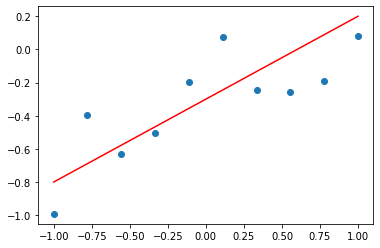

In [68]:
arr = []
for i in x:
    arr.append( -0.3 + 0.5 * i + normal(mu, sigma))
plt.scatter(x, arr)
plt.plot(x, -0.3 + 0.5 * x, c="red")

In [69]:
def mean(w0, w1, x_i):
  y_i = w0 + w1*x_i
  return y_i

In [86]:
def gaus(x,y,w0, w1):
  const = math.sqrt(np.pi*2) * sigma 
  return  const  *  np.exp( -0.5  *  ( ( y - mean( w0, w1, x )) / sigma) **2 )

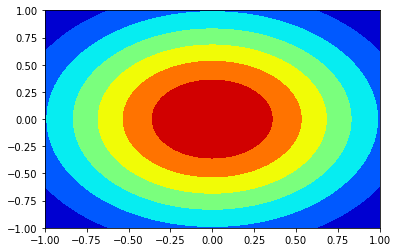

In [87]:
w0, w1 = np.meshgrid(np.linspace(-1, 1, 1000), np.linspace(-1, 1, 1000))
a0 = norm.pdf(w0, 0, math.sqrt(0.5))
a1 = norm.pdf(w1, 0, math.sqrt(0.5))
prior = a0*a1
plt.contourf(w0, w1, prior, cmap = "jet")

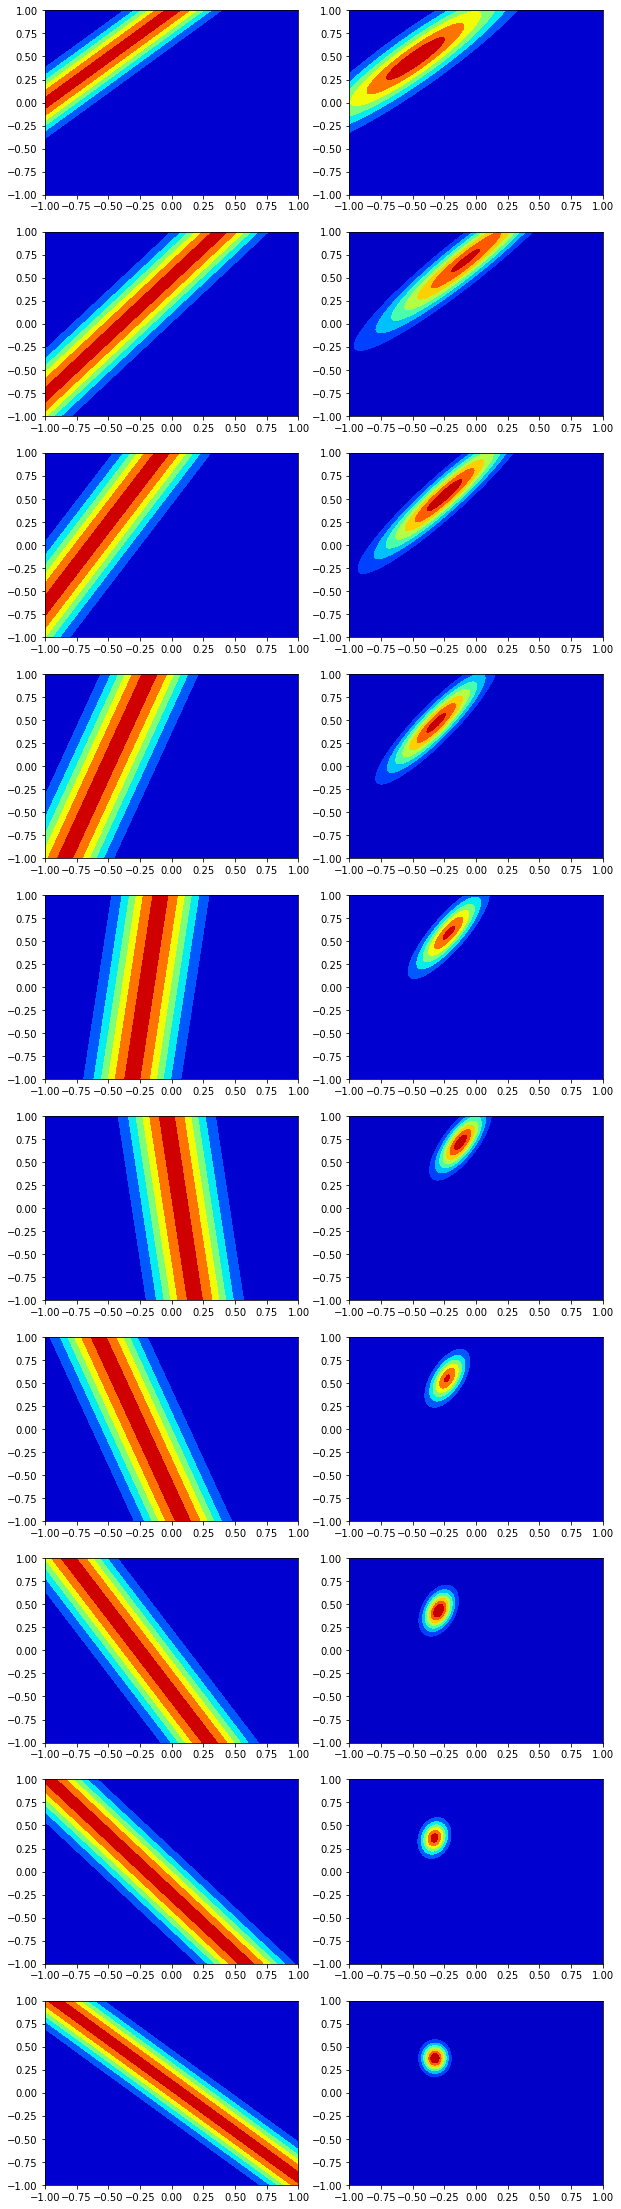

In [88]:
count = 0
fig, axs = plt.subplots(10, 2, figsize = (10, 40))
for i, j in zip(x, arr):
  mle = gaus(i, j, w0, w1)
  posterior = prior * mle
  prior = posterior
  axs[count, 0].contourf(w0, w1, mle, cmap="jet")
  axs[count, 1].contourf(w0, w1, posterior, cmap="jet")
  count += 1

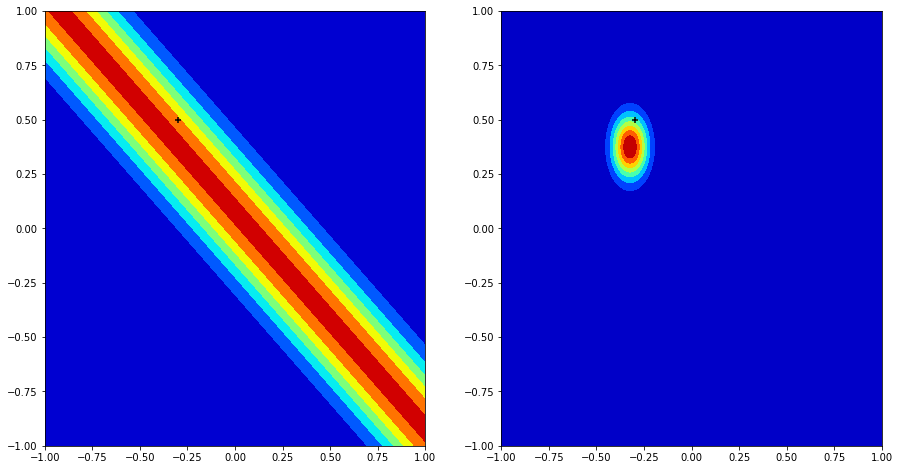

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes[0].contourf(w0, w1, mle, cmap="jet")
axes[0].scatter(c, m, c="black", marker="+")
axes[1].contourf(w0, w1, posterior, cmap="jet")
axes[1].scatter(c, m, c="black", marker="+")
plt.show()